In [1]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt

# Predict using the model
Requires an image to define the input layer of the network.

`image` stores the input image

`config/classes.txt` defines the classes that can be identified.

`config/yolov3.weights` defines the weights of the network. Download them at https://pjreddie.com/media/files/yolov3.weights

`config/yolov3.cfg` defines the structure of the netowrk matching the weights.

In [2]:
#def model (draw_bounding_box)

# read input image
image_raw = cv2.imread('./Images/Goose & Cat.jpg')
# Images/Classification/non-goose/depositphotos_116291278-stock-photo-a-flock-of-pigeons-in copy.jpg

image = image_raw.copy()

width = image.shape[1]
height = image.shape[0]
scale = 0.00392

# read class names from text file
classes = None
with open('config/yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet('config/yolov3.weights', "config/yolov3.cfg")

# create input blob 
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)

In [3]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

def draw_goose_bounding_box(img, x, y, x_plus_w, y_plus_h):
    color = (255,0,0)

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, "Goose", (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [4]:
# run inference through the network
# and gather predictions from output layers
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [5]:
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
print(boxes)
# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))



[[317.5, 32.0, 179, 198], [136.5, 102.0, 513, 240]]


## Display the predictions using MatplotLib

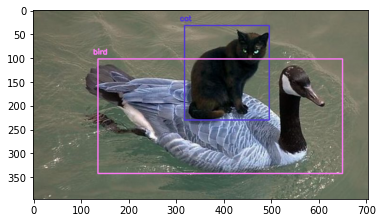

In [6]:
plt.imshow(image)

## Display the predictions using OpenCV

In [7]:
# display output image    
cv2.imshow("object detection", image)

# wait until any key is pressed
cv2.waitKey()
    
 # save output image to disk
cv2.imwrite("object-detection.jpg", image)

# release resources
cv2.destroyAllWindows()

# Extract subimages of interest

317.5, 32.0, 179, 198 = 15


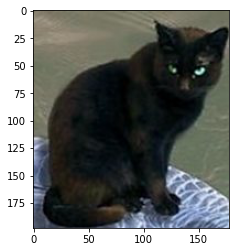

136.5, 102.0, 513, 240 = 14


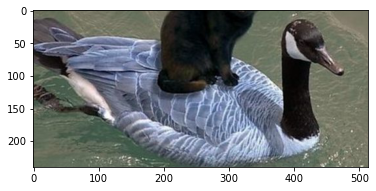

In [8]:
def clamp(n, minn, maxn):
    return max(min(maxn, n), minn)

image = image_raw.copy()
subimages = []
for i in indices:
    i = i[0]
    box = boxes[i]
    x = clamp(box[0], 0, image.shape[0])
    y = clamp(box[1], 0, image.shape[1])
    w = box[2]
    h = box[3]
    
    print(f"{x}, {y}, {w}, {h} = {class_ids[i]}")
    plt.imshow(image[round(y):round(y+h), round(x):round(x+w)])
    plt.show()
    
    if class_ids[i] == 14:
        subimages.append(image[round(y):round(y+h), round(x):round(x+w)])

# Restored Goose Weights
Restoring goose weights from training data

In [9]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers

# num_classes = 2

# model = tf.keras.Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.Conv2D(16, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])
# model.load_weights('config/goose.weights')
model = tf.keras.models.load_model('config/goose_model')
model.summary()

2.3.1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)   

# Scale Image to Same Size
Scale image passed down to same size as data set

Encapsulate in:

`if subimage != None:`

(180, 180, 3)


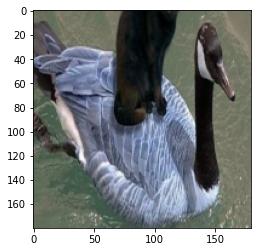

In [10]:
resized_imgs = []
for subimg in subimages:
    resized_imgs.append(cv2.resize(subimg, (180, 180), interpolation = cv2.INTER_AREA))
    print(resized_imgs[-1].shape)
    plt.imshow(resized_imgs[-1])
    plt.show() 

# Predict If image is a goose or not

In [11]:
predictions = []
for img in resized_imgs:
    modelinput = tf.expand_dims(img, axis=0)
    predictions.append(model.predict(modelinput)[0])
    print(f"Activations: {(predictions[-1])}")
    predictions[-1] = np.argmax( predictions[-1])
print(predictions)

Activations: [ 1.5533426 -4.9763193]
[0]


136.5, 102.0, 513, 240 = Is goose


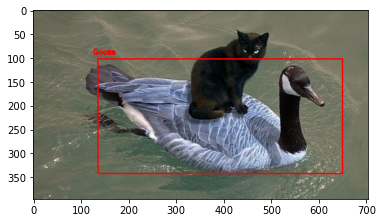

In [12]:
j = -1
for i in indices:
    i = i[0]
    if class_ids[i] == 14:
        j +=1
        if predictions[j] == 1:
            continue
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]

        draw_goose_bounding_box(image, round(x), round(y), round(x+w), round(y+h))
        print(f"{x}, {y}, {w}, {h} = Is goose")
    
    plt.imshow(image)
else:
    plt.imshow(image)